In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
%cd C:\\Users\\sebsa\\Documents\\Centrale Paris\\3A\\OEN\\Projet Synthese\\data

C:\Users\sebsa\Documents\Centrale Paris\3A\OEN\Projet Synthese\data


## Read and format data

### Power Plants

In [3]:
all_powerplants = []
nb_total_files = 0

Solar real

In [4]:
path = 'installed_capacity/Solar/'
files_powerplants = os.listdir(path)
nb_Solar_real = 0
files_powerplants

['CH_solar_filtered_1.csv',
 'DE_solar_filtered_1.csv',
 'DK_solar_filtered_1.csv',
 'FR_solar_filtered_1.csv',
 'PL_solar_filtered_1.csv',
 'randm_gen']

In [5]:
cols = ['energy_source','electrical_capacity','lat','lon']
for name in files_powerplants[:-1]:
    df = pd.read_csv(path+name, index_col=0)
    out = df[cols]
    all_powerplants.append(out)
    nb_total_files += 1
    nb_Solar_real += 1

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,14,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
assert(nb_total_files == len(all_powerplants))

Solar random generation

In [7]:
path = 'installed_capacity/Solar/randm_gen/'
files_powerplants = os.listdir(path)
nb_Solar_rdm = 0
files_powerplants

['BE_N.csv',
 'BE_S.csv',
 'ES_center.csv',
 'ES_N.csv',
 'ES_S.csv',
 'IT_center.csv',
 'IT_NE.csv',
 'IT_NW.csv',
 'IT_sardegna.csv',
 'IT_SE.csv',
 'IT_sicilia.csv',
 'UK_E.csv',
 'UK_SE.csv',
 'UK_SW.csv',
 'UK_W.csv']

In [8]:
cols = ['energy_source','electrical_capacity','lat','lon']
for name in files_powerplants[:-1]:
    df = pd.read_csv(path+name, index_col=0)
    out = df[cols]
    all_powerplants.append(out)
    nb_total_files += 1
    nb_Solar_rdm += 1

In [9]:
assert(nb_total_files == len(all_powerplants))

Wind

In [10]:
path = 'installed_capacity/Wind/Extraction The Wind Power/'
files_powerplants = os.listdir(path)
nb_Wind = 0
files_powerplants

['database_AT.csv',
 'database_AT_formatted.csv',
 'database_BE.csv',
 'database_BE_formatted.csv',
 'database_BG.csv',
 'database_BG_formatted.csv',
 'database_CH.csv',
 'database_CH_formatted.csv',
 'database_CY.csv',
 'database_CY_formatted.csv',
 'database_CZ.csv',
 'database_CZ_formatted.csv',
 'database_DE.csv',
 'database_DE_formatted.csv',
 'database_DK.csv',
 'database_DK_formatted.csv',
 'database_EE.csv',
 'database_EE_formatted.csv',
 'database_FI.csv',
 'database_FI_formatted.csv',
 'database_FR.csv',
 'database_FR_formatted.csv',
 'database_GB.csv',
 'database_GB_formatted.csv',
 'database_GR.csv',
 'database_GR_formatted.csv',
 'database_HR.csv',
 'database_HR_formatted.csv',
 'database_HU.csv',
 'database_HU_formatted.csv',
 'database_IE.csv',
 'database_IE_formatted.csv',
 'database_IT.csv',
 'database_IT_formatted.csv',
 'database_LU.csv',
 'database_LU_formatted.csv',
 'database_LV.csv',
 'database_LV_formatted.csv',
 'database_MK.csv',
 'database_MK_formatted.csv',


In [11]:
cols = ['energy_source','electrical_capacity','lat','lon']
for name in files_powerplants[:-1]:
    if 'formatted' in name:
        df = pd.read_csv(path+name, index_col=0)
        df['electrical_capacity'] = df['Total nominal power']
        df['lat'] = df['Latitude']
        df['lon'] = df['Longitude']
        out = df[cols]
        all_powerplants.append(out)
        nb_total_files += 1
        nb_Wind += 1

In [12]:
assert(nb_total_files == len(all_powerplants))

Concatenate df

In [13]:
assert(nb_total_files == nb_Solar_rdm+nb_Solar_real+nb_Wind)
assert(nb_total_files == len(all_powerplants))

In [14]:
df_all_powerplants = pd.concat(all_powerplants).reset_index().drop(['index'],axis=1)
df_all_powerplants['number'] = np.arange(len(df_all_powerplants))
df_all_powerplants['name'] = 'name_' + df_all_powerplants['number'].map(str)
df_all_powerplants.drop(['number'], axis=1, inplace=True)

In [15]:
df_all_powerplants.head()

,energy_source,electrical_capacity,lat,lon,name
0,Solar,0.2704,46.1795,6.1391,name_0
1,Solar,0.1100,47.0600,7.0635,name_1
2,Solar,0.0320,47.1742,8.7059,name_2
3,Solar,0.0396,46.5285,6.6187,name_3
4,Solar,0.0432,47.6405,9.1755,name_4


### Buses

In [16]:
path = 'reseau/buses_formatted.csv'
buses = pd.read_csv(path, index_col=0)
buses.head()

,bus_id,station_id,voltage,dc,symbol,lon,lat
26,6723,7564,380.0,f,joint,-0.977047,37.961746
27,6724,7565,380.0,f,joint,-0.769043,39.436193
28,6725,7566,380.0,f,joint,-0.296631,40.195659
56,6726,7567,380.0,f,joint,21.718037,42.033235
57,6727,7568,380.0,f,joint,22.061897,42.033604


## Associate

In [17]:
from math import cos, asin, sqrt
from tqdm import tqdm

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    list_dist = []
    for p in data:
        list_dist.append(distance(v['lat'],v['lon'],p['lat'],p['lon']))
    return (list_dist.index(min(list_dist)), min(list_dist))
#     return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

tempDataList = [{'lat': 39.7612992, 'lon': -86.1519681}, 
                {'lat': 39.762241,  'lon': -86.158436 }, 
                {'lat': 39.7622292, 'lon': -86.1578917}]

v = {'lat': 39.7622290, 'lon': -86.1519750}
index_bus, dist = closest(tempDataList, v)
print(index_bus)
print(dist)

0
0.10339070310220466


In [18]:
datalist = buses.to_dict(orient='records')

for index, row in tqdm(df_all_powerplants.iterrows()):
    mypoint = {'lat': row['lat'], 'lon': row['lon']}
    index_bus, dist = closest(datalist, mypoint)
    df_all_powerplants.set_value(index, 'bus_id', buses.iloc[index_bus]['bus_id'])
    df_all_powerplants.set_value(index, 'dist_bus_km', dist)

1765972it [7:13:43, 67.86it/s]


In [19]:
df_all_powerplants.bus_id = df_all_powerplants.bus_id.astype('int64')

In [20]:
df_all_powerplants.head()

,energy_source,electrical_capacity,lat,lon,name,bus_id,dist_bus_km
0,Solar,0.2704,46.1795,6.1391,name_0,5114,7.518470
1,Solar,0.1100,47.0600,7.0635,name_1,5533,4.646528
2,Solar,0.0320,47.1742,8.7059,name_2,5566,3.157175
3,Solar,0.0396,46.5285,6.6187,name_3,5618,8.821213
4,Solar,0.0432,47.6405,9.1755,name_4,5607,13.099617


In [21]:
df_all_powerplants.to_csv('all_powerplants_with_bus.csv')

## Explore

In [4]:
df_all_powerplants = pd.read_csv('all_powerplants_with_bus.csv', index_col=0)
df_all_powerplants.head()

,energy_source,electrical_capacity,lat,lon,name,bus_id,dist_bus_km
0,Solar,0.2704,46.1795,6.1391,name_0,5114,7.518470
1,Solar,0.1100,47.0600,7.0635,name_1,5533,4.646528
2,Solar,0.0320,47.1742,8.7059,name_2,5566,3.157175
3,Solar,0.0396,46.5285,6.6187,name_3,5618,8.821213
4,Solar,0.0432,47.6405,9.1755,name_4,5607,13.099617


In [5]:
df_all_powerplants.dist_bus_km.describe()

count    1.765746e+06
mean     1.351453e+01
std      3.431492e+01
min      3.271121e-02
25%      6.818274e+00
50%      1.160078e+01
75%      1.827481e+01
max      1.625941e+04
Name: dist_bus_km, dtype: float64

In [13]:
df_all_powerplants.dropna(inplace=True)

Number of points under 60 km : 1765334
Number of points above 60 km : 379


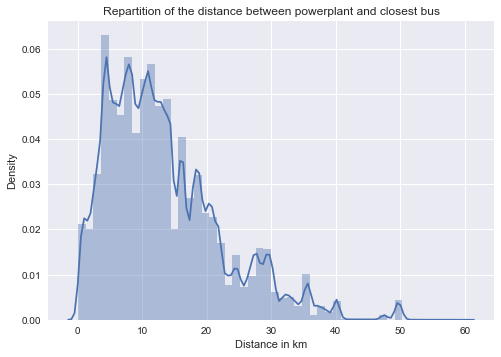

In [24]:
sns.set(color_codes=True)

limit = 60
print('Number of points under {0} km : {1}'
      .format(limit,df_all_powerplants.dist_bus_km[df_all_powerplants.dist_bus_km <= limit].count()))
print('Number of points above {0} km : {1}'
      .format(limit,df_all_powerplants.dist_bus_km[df_all_powerplants.dist_bus_km > limit].count()))

sns.distplot(df_all_powerplants.dist_bus_km[df_all_powerplants.dist_bus_km <= limit])
sns.plt.title('Repartition of the distance between powerplant and closest bus')
sns.plt.xlabel('Distance in km')
sns.plt.ylabel('Density')